# **Reconhecimento de expressão facial utilizando CNN**

# **Introdução**

O reconhecimento de expressões faciais é uma tarefa complexa e de grande relevância em áreas como segurança, saúde, marketing e interação homem-máquina. Identificar com precisão as emoções de uma pessoa por meio de sua expressão facial requer modelos capazes de lidar com a diversidade cultural, variações individuais e condições ambientais, como iluminação e ângulo de captura.


## **Objetivo:**
Este projeto tem como objetivo desenvolver um modelo de reconhecimento de expressões faciais utilizando redes neurais convolucionais (CNNs). O modelo será treinado em um conjunto de dados chamado "Face Expression Recognition Dataset" extraido do site https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset no qual é utilizado para identificar emoções básicas, como felicidade, tristeza, raiva, surpresa, nojo e neutralidade. O sistema resultante pode ser aplicado em contextos como atendimento ao cliente, monitoramento de bem-estar emocional e sistemas de segurança.

### **Motivo da Escolha**
O "Face Expression Recognition Dataset" foi escolhido devido a:
- **Variedade de expressões:** Permite ao modelo aprender uma ampla gama de emoções humanas.
- **Organização:** A separação clara entre categorias e conjuntos de treinamento/validação acelera o pipeline de desenvolvimento.
- **Compatibilidade:** Ideal para projetos que utilizam CNNs, devido à estrutura e volume dos dados.

## **Descrição do Problema:**
O principal desafio no reconhecimento de expressões faciais está na capacidade de generalização do modelo. As expressões podem variar significativamente devido a fatores como idade, gênero, cultura e interferências externas, como iluminação e ruído na imagem. Este projeto busca desenvolver um modelo robusto que seja capaz de identificar padrões consistentes nas diferentes variações e realizar previsões precisas em novos cenários.

## **Tipo de Problema:**
Trata-se de um problema de classificação supervisionada, em que o modelo aprenderá a associar as características faciais presentes nas imagens a classes específicas de emoções. As imagens no conjunto de dados serão rotuladas com a emoção correspondente, permitindo que a rede convolucional seja treinada para realizar essa classificação.

## **Premissas e Hipóteses:**

*   **Premissa:** As características visuais de expressões faciais humanas são representações consistentes das emoções correspondentes. &nbsp;

*   **Hipótese:** Um modelo baseado em CNNs pode aprender padrões específicos em imagens faciais que correspondem às diferentes emoções, mesmo diante de variações individuais e ambientais.&nbsp;

## **Restrições e Condições:**

**Restrição:** O modelo será treinado exclusivamente com os dados disponíveis em https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset.
Não será necessário a utilização de validação cruzada, já que há uma quantidade significativa de imagens para cada classe. O conjunto de dados pode ser dividido em treinamento, validação e teste de forma estável.

**Condição:** A aplicação do modelo será limitada a expressões faciais que correspondam às categorias presentes no conjunto de dados.

# **Importando as bibliotecas**:
No desenvolvimento de um modelo de reconhecimento de expressões faciais utilizando CNNs, várias bibliotecas desempenham papéis essenciais, desde a manipulação de imagens até a construção, treinamento e avaliação do modelo. A seguir, descrevemos a funcionalidade de cada biblioteca e como elas são utilizadas neste projeto:

- **os:** Essa biblioteca é usada para operações relacionadas ao sistema operacional, como navegação em diretórios, manipulação de arquivos e verificação da estrutura de pastas. É essencial para carregar e organizar o conjunto de dados de imagens.

- **cv2 (OpenCV):** Biblioteca amplamente utilizada para processamento de imagens e visão computacional. Aqui, ela é empregada para leitura, manipulação e pré-processamento de imagens, como redimensionamento, conversão para escala de cinza e detecção de faces.

- **numpy:** Biblioteca fundamental para cálculos matemáticos e manipulação de arrays. É utilizada para representar imagens como arrays numéricos, realizar operações vetorizadas e facilitar a manipulação de dados durante o pré-processamento.

- **tensorflow:** Um dos principais frameworks para desenvolvimento de modelos de aprendizado de máquina e deep learning. Ele fornece as ferramentas necessárias para criar e treinar redes neurais convolucionais (CNNs), base do modelo de reconhecimento de expressões faciais.

- **sklearn.model_selection.train_test_split:** Função do scikit-learn que divide o conjunto de dados em subconjuntos de treinamento e teste, garantindo uma separação adequada para validação do modelo.

- **sklearn.preprocessing.LabelEncoder:** Essa classe transforma rótulos de classe (emoções) em valores numéricos, facilitando sua manipulação e uso em modelos de aprendizado de máquina.

- **tensorflow.keras.utils.to_categorical:** Converte os rótulos numéricos das emoções em vetores one-hot, que são necessários para o treinamento supervisionado em problemas de classificação.

- **tensorflow.keras.models.Sequential e tensorflow.keras.models.Model:** Estruturas para construção de modelos em Keras. O Sequential é usado para criar modelos com uma sequência linear de camadas, enquanto o Model permite criar arquiteturas mais complexas com várias entradas e saídas.

- **Camadas do tensorflow.keras.layers:**
 - **Dense:** Camada totalmente conectada para combinar os recursos extraídos pela CNN.
 - **Dropout:** Regularizador que ajuda a reduzir o overfitting desligando aleatoriamente algumas conexões durante o treinamento.
 - **BatchNormalization:** Normaliza as ativações de cada camada, acelerando o treinamento e melhorando a estabilidade.
 - **Flatten:** Transforma matrizes multidimensionais em vetores, facilitando a entrada em camadas densas.
 - **GlobalAveragePooling2D:** Reduz a dimensionalidade das características extraídas pela CNN, permitindo uma representação compacta.
 - **Conv2D e MaxPooling2D:** Camadas de convolução e pooling para extração de características visuais relevantes.
 - **Activation:** Aplica funções de ativação, como **ReLU** ou **softmax**, para introduzir não-linearidade no modelo.
 - **tensorflow.keras.optimizers.Adam:** Otimizador avançado que combina os benefícios de métodos como RMSprop e Momentum, permitindo um treinamento eficiente e com ajuste automático da taxa de aprendizado.

- **tensorflow.keras.preprocessing.image.ImageDataGenerator:** Realiza data augmentation, aumentando a diversidade do conjunto de treinamento por meio de transformações nas imagens, como rotações, deslocamentos e inversões. Isso melhora a robustez do modelo.

- **tensorflow.keras.regularizers:** Regularização L2 (peso de decaimento) nas camadas densas e convolucionais para controlar o overfitting

- **matplotlib.pyplot:** Ferramenta para visualização de dados. É usada para criar gráficos que mostram o desempenho do modelo durante o treinamento e a avaliação, como curvas de perda e acurácia.

Essas bibliotecas, combinadas, formam a base necessária para lidar com todas as etapas do desenvolvimento do modelo, desde o pré-processamento de dados até a avaliação final.

In [3]:
#Instalador do TensorFlow caso necessário
%pip install tensorflow=='2.17.0'

In [ ]:
# Importando as bibliotecas
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# **Descrição do Dataset: "Face Expression Recognition"**

O dataset utilizado neste projeto é "Face Expression Recognition", foi obtido do repositório Kaggle e contém imagens categorizadas para o treinamento e avaliação de modelos de reconhecimento de expressões faciais. Este conjunto de dados é amplamente utilizado para projetos de aprendizado de máquina e deep learning relacionados à visão computacional, devido à sua diversidade e organização bem estruturada.

## **Estrutura do Dataset**
O dataset está dividido em pastas que representam diferentes categorias de expressões faciais. Cada pasta contém imagens correspondentes a uma emoção específica, como:

- Raiva (Angry)
- Nojo (Disgust)
- Medo (Fear)
- Felicidade (Happy)
- Tristeza (Sad)
- Surpresa (Surprise)
- Neutro (Neutral)

Essas categorias são usadas como classes para o modelo de classificação.

## **Características do Dataset**
### **Formato das Imagens:**
As imagens são geralmente em tons de cinza (grayscale) e variam em resolução, o que exige pré-processamento para padronização.

### **Quantidade de Dados:**
O data set contem, no diretório "train", 28.821 imagens, com isso foi subdivido em conjuntos, sendo:
- **Treinamento:** 70% das imagens, com a maior parte dos dados está destinada ao treinamento do modelo.
- **Teste**: 20% das imagens destinadas a Testes
- **Validação**: 10% das imagens destinadas a Validação do modelo

### **Etiquetagem:**
Cada imagem está associada a um rótulo indicando a emoção correspondente de acordo com sua sub-pasta, facilitando a categorização supervisionada no treinamento do modelo.

### **Pré-processamento Necessário**
Antes de alimentar o dataset no modelo, algumas etapas de pré-processamento são necessárias:
- **Redimensionamento das imagens:** Todas as imagens são submetidas a um resize para 48x48 pixels. Isso é necessário para garantir uniformidade e compatibilidade com as entradas da CNN.
- **Normalização:** Os valores de pixel são normalizados para o intervalo [0, 1], utilizando o método de divisão por 255, melhorando a convergência durante o treinamento.
- **Data Augmentation:** Aumenta a diversidade do conjunto de dados, aplicando transformações como rotações, inversões horizontais e ajustes de brilho.

## **Considerações**
Este dataset é uma base sólida para o treinamento de modelos de reconhecimento facial e tem sido amplamente utilizado na comunidade de aprendizado de máquina. O objetivo principal é treinar um modelo que consiga identificar corretamente a emoção associada a cada expressão facial, mesmo em cenários desafiadores, como iluminação variável ou pequenas diferenças nos ângulos das imagens.

### **Obs.:**
Para facilitar a importação do dataset, pode-se utilizar do .cache, que é criado pelo kaggle, e importa-lo para dentro do projeto. Porem o dataset utilizado se encontra na pasta dataset e a variavel data_dir poderá ser descomentadas

In [ ]:
# Download do data-set "Face Expression recognition"
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jonathanoheix/face-expression-recognition-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\ramom\.cache\kagglehub\datasets\jonathanoheix\face-expression-recognition-dataset\versions\1


In [ ]:
# Dataset Diretório
# Importação dos dados e salvos no cache do Colab
data_dir = "/root/.cache/kagglehub/datasets/jonathanoheix/face-expression-recognition-dataset/versions/1/images/train"

#Usado para dataset local
#data_dir = "dataset/images/train"

In [8]:
# Classes
sub_folders = os.listdir(data_dir)
print(sub_folders)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [9]:
# Declarando as listas para salvar as Imagens e classe target
images = []
labels = []

O processo a seguir é utilizado para destrinchar todos as subpastas do data set e salvar nas listas já declaradas

In [22]:
# Acessando as classes
for sub_folder in sub_folders:
    label = sub_folder

    # Construindo o diretorio para a sub pasta atual
    path = os.path.join(data_dir, sub_folder)

    # Listando todas as imagens que estão na sub-pasta atual
    sub_folder_images = os.listdir(path)

    # Acessando as imagens
    for image_name in sub_folder_images:
        # Contruindo o diretório da imagem atual
        image_path = os.path.join(path, image_name)

        # Carregando a imagem usando o OpenCV
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Lendo com escalas em cinzas (GrayScale)

        # Adicionando a imagem na lista de imagem
        images.append(img)

        # Adicionando a classe correspondente a atual sub-pasta na lista de classes
        labels.append(label)

In [23]:
# Convertando as listas de imagens de classes para NumPy Arrays
images = np.array(images)
labels = np.array(labels)
print(len(images))

28821


In [24]:
# Separando o Dataset entre treinamento, validação e Teste
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42)

In [25]:
# Função para pré-processamento das imagens
def preprocessamento(img):
    # Acessa uma imagem e a redimensiona para as dimensões especificadas (48 x 48)
    img = cv2.resize(img, (48, 48))

    # Normalização dos valores de cada pixel para valores entre 0 e 1
    img = img / 255.0

    # Remodelar para corresponder ao formato de entrada
    return img.reshape(-1, 48, 48, 1)

**Observação:** O método .reshape() do NumPy é usado para alterar a forma (dimensões) de um array sem mudar seus dados. A função reorganiza os elementos do array original para se encaixarem nas novas dimensões especificadas.

Nos casos abaixo, foi utilizado .reshape(-1, 48, 48, 1), no qual o novo formato especificado tem 4 dimensões:
- **-1:** Este argumento instrui o NumPy a atribuir automaticamente o tamanho dessa dimensão com base no total de elementos do array e nas demais dimensões especificadas.
- **48 e 48:** Cada imagem é redimensionada para ter 48 pixels de altura e 48 pixels de largura. Isso é necessário porque redes neurais convolucionais (CNNs) geralmente requerem entradas com tamanhos consistentes.
- **1:** Este é o número de canais da imagem. No caso de imagens em escala de cinza (grayscale), há apenas 1 canal (diferente de imagens coloridas, que têm 3 canais - RGB).

In [26]:
# Aplicar pré-processamento a conjuntos de treinamento, validação e teste
X_train = np.array(list(map(preprocessamento, X_train)))
X_val = np.array(list(map(preprocessamento, X_val)))
X_test = np.array(list(map(preprocessamento, X_test)))

In [27]:
# Remodele os dados de entrada para remover dimensões desnecessárias
X_train = X_train.reshape(-1, 48, 48, 1)
X_val = X_val.reshape(-1, 48, 48, 1)
X_test = X_test.reshape(-1, 48, 48, 1)

In [28]:
# Inicializar ImageDataGenerator para aumento de dados
data_gen = ImageDataGenerator(
    width_shift_range=0.1,  # Deslocamento da imagem no eixo horizontal 10%
    height_shift_range=0.1, # Deslocamento da imagem no eixo vertical 10%
    zoom_range=0.1,         # Aplica Zoom a imagem de 10%
    shear_range=0.1,        # Aplica uma transformação de cisalhamento de 10%
    rotation_range=10       # Rotaciona a imagem em 10 Graus
)

# Calcular estatísticas necessárias para aumento de dados
data_gen.fit(X_train)

In [29]:
# Codificação os rótulos de classe
label_encoder = LabelEncoder()
label_encoder.fit(labels)

LabelEncoder()

In [30]:
# Codificação dos rótulos de classe para conjuntos de treinamento, validação e teste
y_train = label_encoder.transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

In [31]:
# Obter o número de classes
num_classes = len(label_encoder.classes_)
print(num_classes)

# Converter rótulos de classe codificados em matrizes categóricas codificadas one-hot
y_train_categorical = to_categorical(y_train, num_classes=num_classes)
y_val_categorical = to_categorical(y_val, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

7


## **Criação do primeiro Modelo**
- **1ª Camada:** Camada Convolucional com 64 filtros de tamanho (7, 7), ativação ReLU e forma de entrada (48, 48, 1), indicando imagens em escala de cinza de tamanho 48x48. A primeira camada de MaxPooling2D com tamanho de pool (4) reduz as dimensões espaciais.

- **2ª Camada:** Camada Convolucional com 128 filtros de tamanho (7, 7), ativação ReLU e padding 'same'. Outra camada de MaxPooling2D com tamanho de pool (4) é aplicada para redução de dimensionalidade.

- **Camada de Flatten:** A saída das camadas convolucionais é achatada em um vetor unidimensional para ser alimentada nas camadas totalmente conectadas.

- **Camada Totalmente Conectada 1:** Uma camada densa com 64 unidades e Dropout (0.4) para regularização, seguida de ativação ReLU. Esta camada processa as características extraídas pelas camadas convolucionais.

- **Camada Totalmente Conectada 2:** Uma camada densa com unidades iguais ao número de classes (7), seguida de ativação softmax para classificação multiclasse. A função softmax gera uma distribuição de probabilidades entre as classes.

- **Compilação:** O modelo é compilado usando o otimizador Adam, a função de perda entropia cruzada categórica para classificação multiclasse e a acurácia como métrica de avaliação.

In [ ]:
# Criando o primeiro modelo
def get_model():
  # Cria um modelo sequencial, onde as camadas são adicionadas uma após a outra.
  model = Sequential()

  # Primeira camada
  model.add(Conv2D(64, kernel_size=num_classes, activation='relu', input_shape=(48, 48, 1)))
  model.add(MaxPooling2D(pool_size=(4)))

  # Segunda camada
  model.add(Conv2D(128, num_classes, activation='relu', padding='same' ))
  model.add(MaxPooling2D(pool_size=(4)))

  # Flatten
  model.add(Flatten())

  # Camada Totalmente Conectada 1
  model.add(Dense(units = 64))
  model.add(Dropout(0.4))

  # Camada Totalmente Conectada 2
  model.add(Dense(units = num_classes))
  model.add(Activation('softmax'))

  return model

In [17]:
# Construindo o modelo
model = get_model()
print(model.summary())

c:\Users\ramom\Desktop\Pós\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 42, 42, 64)     │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 128)    │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           455 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 7)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 438,023 (1.67 MB)

 Trainable params: 438,023 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Compilando o modelo
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [ ]:
# Treinando o modelo
history = model.fit(
    data_gen.flow(X_train, y_train_categorical, batch_size=128),
    validation_data=(X_val, y_val_categorical),
    epochs=50,
    verbose=1
)

Epoch 1/50


c:\Users\ramom\Desktop\Pós\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 19s 106ms/step - accuracy: 0.2285 - loss: 1.8367 - val_accuracy: 0.2871 - val_loss: 1.7005
Epoch 2/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 17s 103ms/step - accuracy: 0.3274 - loss: 1.6915 - val_accuracy: 0.4072 - val_loss: 1.5238
Epoch 3/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 18s 108ms/step - accuracy: 0.3843 - loss: 1.5906 - val_accuracy: 0.4297 - val_loss: 1.4845
Epoch 4/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 18s 110ms/step - accuracy: 0.4057 - loss: 1.5485 - val_accuracy: 0.4436 - val_loss: 1.4383
Epoch 5/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 18s 110ms/step - accuracy: 0.4251 - loss: 1.4899 - val_accuracy: 0.4670 - val_loss: 1.4008
Epoch 6/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 18s 111ms/step - accuracy: 0.4305 - loss: 1.4713 - val_accuracy: 0.4814 - val_loss: 1.3735
Epoch 7/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 18s 110ms/step - accuracy: 0.4497 - loss: 1.4409 - val_accuracy: 0.4948 - val_loss: 1.3634
Epoch 8/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 18s 110ms/step - accuracy: 0.4708 - loss: 1.3968 - val

In [ ]:
# Salvando o modelo com a extensão .keras
model.save("modelv1.keras")

In [ ]:
# Salvando o modelo com a extensão .h5
model.save('modelv1.h5')

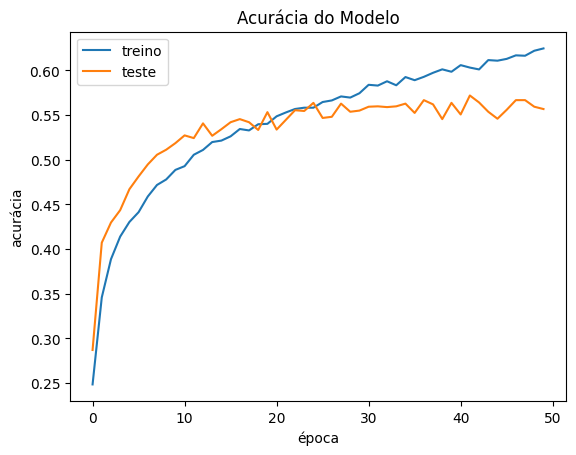

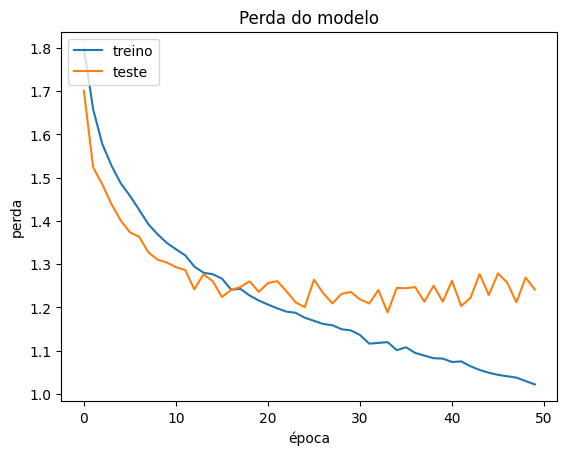

In [22]:
# plotamos a acurácia a partir do histórico
plt.plot(history.history['accuracy'])  # acurácia do treinamento
plt.plot(history.history['val_accuracy']) # acurácia na validação (teste)
plt.title('Acurácia do Modelo')
plt.ylabel('acurácia')
plt.xlabel('época')
plt.legend(['treino', 'teste'], loc='upper left')
plt.show()

# plotamos o erro/perda a partir do histórico
plt.plot(history.history['loss']) # perda/erro durante o treinamento
plt.plot(history.history['val_loss']) #perda/erro durante a validação (teste)
plt.title('Perda do modelo')
plt.ylabel('perda')
plt.xlabel('época')
plt.legend(['treino', 'teste'], loc='upper left')
plt.show()


181/181 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Número de classes: 7
Rótulos reais: [0 1 2 3 4 5 6]


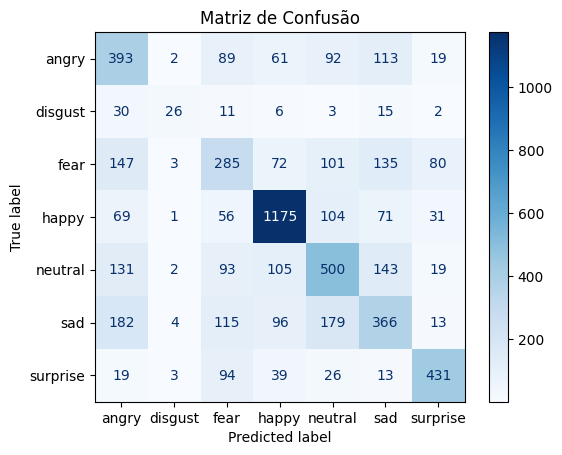

In [ ]:
# Fazer previsões no conjunto de teste
y_pred_prob = model.predict(X_test)  # Saída do modelo em probabilidades
y_pred = np.argmax(y_pred_prob, axis=1)  # Converter para índices das classes

# Converter os rótulos reais para o mesmo formato
y_true = np.argmax(y_test_categorical, axis=1)

# Atualizar labels para corresponder ao número de classes
labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Gerar a matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()

### **Conclusão:** 
Este modelo pode ser considerado bom, especialmente pela estabilidade entre os dados de treino e teste, além de sua capacidade de capturar padrões para classes majoritárias (como "happy"), porem o desempenho pode ser melhorado para classes minoritárias (ex.: "disgust")

## **Criação do segundo Modelo**
- **1º Camada**: Camada Convolucional com 32 filtros de tamanho (3, 3) e ativação ReLU, responsável por extrair características das imagens de entrada (tamanho (48, 48, 1), imagens em escala de cinza).
MaxPooling2D com tamanho de pool (2, 2) é aplicada para reduzir as dimensões espaciais da imagem, preservando as características mais importantes.

- **2ª Camada:**
Camada Convolucional com 64 filtros de tamanho (3, 3) e ativação ReLU, para continuar a extração de características. Outra camada de MaxPooling2D com tamanho de pool (2, 2) é aplicada para redução de dimensionalidade.

- **3ª Camada:**
Camada Convolucional com 128 filtros de tamanho (3, 3) e ativação ReLU, aprofundando a extração de características.
Mais uma camada de MaxPooling2D com tamanho de pool (2, 2) para reduzir ainda mais a dimensionalidade.

- **Flatten:** A saída das camadas convolucionais é achatada em um vetor unidimensional para ser alimentada nas camadas densas.

- **Camada Totalmente Conectada 1:** Com 128 unidades e ativação ReLU, para realizar uma combinação não linear das características extraída e Dropout (0.5) que desativa aleatoriamente 50% dos neurônios durante o treinamento, ajudando a evitar overfitting.

- **Camada Totalmente Conectada 2:** Uma camada densa com unidades iguais ao número de classes (7), seguida de ativação softmax para classificação multiclasse. A função softmax gera uma distribuição de probabilidades entre as classes.

- **Compilação:** O modelo é compilado usando o otimizador Adam, a função de perda entropia cruzada categórica para classificação multiclasse e a acurácia como métrica de avaliação.

In [ ]:

def get_model_v2():
  # Construção do modelo CNN
  model = Sequential()

  # Primeira camada
  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # Segunda camada
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # Terceira camada
  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # Flatten
  model.add(Flatten())

  # Camada Totalmente Conectada 1
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))

  # Camada Totalmente Conectada 2
  model.add(Dense(num_classes, activation='softmax'))
  return model

In [37]:
# Contruindo o modelo 2
model_v2 = get_model_v2()
print(model_v2.summary())

c:\Users\ramom\Desktop\Pós\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

None


In [38]:
# Compilação do modelo
model_v2.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [39]:
# Treinamento do modelo
history = model_v2.fit(
    data_gen.flow(X_train, y_train_categorical, batch_size=128),
    validation_data=(X_val, y_val_categorical),
    epochs=50,
    verbose=1
)

Epoch 1/50


c:\Users\ramom\Desktop\Pós\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - accuracy: 0.2253 - loss: 1.8500 - val_accuracy: 0.2528 - val_loss: 1.7787
Epoch 2/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.2500 - loss: 1.7863 - val_accuracy: 0.3196 - val_loss: 1.7088
Epoch 3/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.2948 - loss: 1.7358 - val_accuracy: 0.3729 - val_loss: 1.6334
Epoch 4/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.3141 - loss: 1.6997 - val_accuracy: 0.4163 - val_loss: 1.5295
Epoch 5/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.3524 - loss: 1.6303 - val_accuracy: 0.4402 - val_loss: 1.4783
Epoch 6/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - accuracy: 0.3831 - loss: 1.5675 - val_accuracy: 0.4367 - val_loss: 1.4531
Epoch 7/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.4036 - loss: 1.5452 - val_accuracy: 0.4662 - val_loss: 1.3873
Epoch 8/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.4208 - loss: 1.5070 - val_accurac

In [ ]:
# Salvando o modelo com a extensão .keras
model_v2.save("modelv2.keras")

In [ ]:
# Salvando o modelo com a extensão .h5
model_v2.save('modelv2.h5')

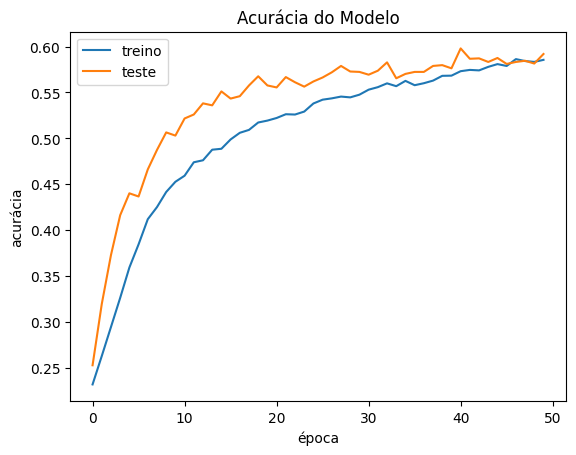

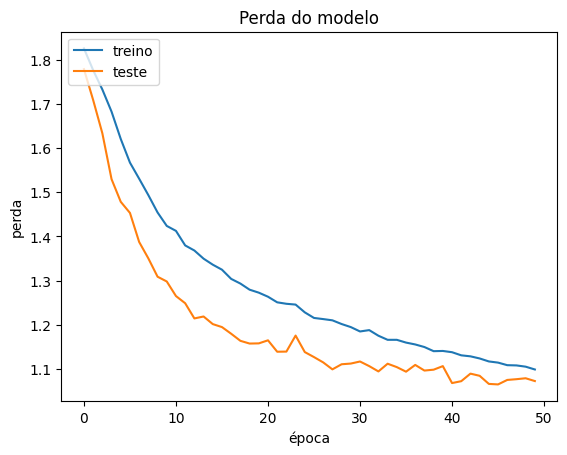

In [42]:
# plotamos a acurácia a partir do histórico
plt.plot(history.history['accuracy'])  # acurácia do treinamento
plt.plot(history.history['val_accuracy']) # acurácia na validação (teste)
plt.title('Acurácia do Modelo')
plt.ylabel('acurácia')
plt.xlabel('época')
plt.legend(['treino', 'teste'], loc='upper left')
plt.show()

# plotamos o erro/perda a partir do histórico
plt.plot(history.history['loss']) # perda/erro durante o treinamento
plt.plot(history.history['val_loss']) #perda/erro durante a validação (teste)
plt.title('Perda do modelo')
plt.ylabel('perda')
plt.xlabel('época')
plt.legend(['treino', 'teste'], loc='upper left')
plt.show()

181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Número de classes: 7
Rótulos reais: [0 1 2 3 4 5 6]


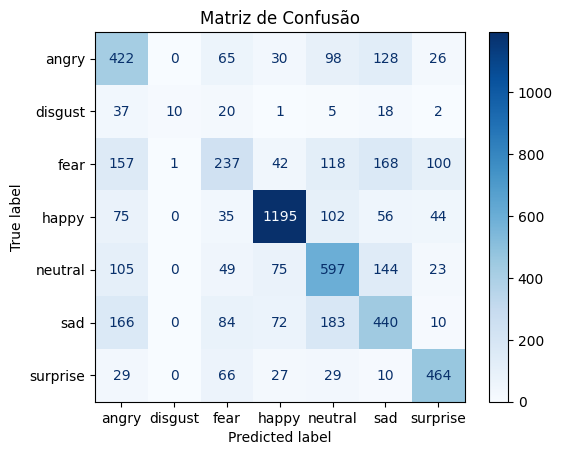

In [ ]:
# Fazer previsões no conjunto de teste
y_pred_prob = model_v2.predict(X_test)  # Saída do modelo em probabilidades
y_pred = np.argmax(y_pred_prob, axis=1)  # Converter para índices das classes

# Converter os rótulos reais para o mesmo formato
y_true = np.argmax(y_test_categorical, axis=1)

# Atualizar labels para corresponder ao número de classes
labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Gerar a matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()

### **Conclusão:**
O modelo se adaptou melhor as classes com mais prodominancias, mas ainda teve dificuldade na indentificação de classes com menor quantidade de dados.

## **Criação do terceiro Modelo**

- **1ª Camada:** Camada convolucional com 64 filtros de tamanho (5, 5), ativação ReLU e normalização em lote (batch normalization). Camadas de MaxPooling e Dropout são adicionadas para regularização.

- **2ª Camada:** Camada convolucional com 128 filtros de tamanho (3, 3), ativação ReLU e normalização em lote. Camadas de MaxPooling e Dropout são adicionadas para regularização.

- **3ª Camada:** Camada convolucional com 512 filtros de tamanho (3, 3), ativação ReLU e normalização em lote. Camadas de MaxPooling e Dropout são adicionadas para regularização.

- **4ª Camada:** Camada convolucional com 512 filtros de tamanho (3, 3), ativação ReLU e normalização em lote. Camadas de MaxPooling e Dropout são adicionadas para regularização.

- **Camada de Flatten:** Achata a saída das camadas convolucionais para que seja possível alimentá-la nas camadas totalmente conectadas (fully connected).

- **1ª Camada Totalmente Conectada:** Camada densa com 256 unidades e ativação ReLU, seguida por normalização em lote e dropout para regularização.

- **2ª Camada Totalmente Conectada:** Camada densa com 512 unidades e ativação ReLU, seguida por normalização em lote e dropout para regularização.

- **Camada de Saída:** Camada densa com ativação softmax para classificação multiclasse, com o número de unidades igual ao número de classes do conjunto de dados.

In [ ]:
def get_model_v3():
    model = Sequential()
    # Primeira Camada
    model.add(Conv2D(64, (5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=(48, 48, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.3))

    # Segunda Camada
    model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.3))

    # Terceira Camada
    model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.3))

    # Quarta Camada
    model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.3))

    # Flatten
    model.add(Flatten())

    # Camada Totalmente Conectada 1
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Camada Totalmente Conectada 2
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Camada de Saida
    model.add(Dense(num_classes, activation='softmax'))

    return model

In [ ]:
# Contruindo o modelo 3
model_v3 = get_model_v3()
print(model_v3.summary())

c:\Users\ramom\Desktop\Pós\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 48, 48, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │             

 Total params: 4,348,679 (16.59 MB)

 Trainable params: 4,344,711 (16.57 MB)

 Non-trainable params: 3,968 (15.50 KB)

None


In [46]:
# Compilação do modelo
model_v3.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
# Treinamento do modelo
history = model_v3.fit(
    data_gen.flow(X_train, y_train_categorical, batch_size=128),
    validation_data=(X_val, y_val_categorical),
    epochs=50,
    verbose=1
)

Epoch 1/50


c:\Users\ramom\Desktop\Pós\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 130s 773ms/step - accuracy: 0.1898 - loss: 2.4092 - val_accuracy: 0.2515 - val_loss: 2.9064
Epoch 2/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 127s 777ms/step - accuracy: 0.2502 - loss: 1.9412 - val_accuracy: 0.1717 - val_loss: 3.8512
Epoch 3/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 128s 784ms/step - accuracy: 0.3111 - loss: 1.7698 - val_accuracy: 0.3101 - val_loss: 2.0133
Epoch 4/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 127s 781ms/step - accuracy: 0.3716 - loss: 1.6421 - val_accuracy: 0.2507 - val_loss: 2.8388
Epoch 5/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 127s 777ms/step - accuracy: 0.4026 - loss: 1.5514 - val_accuracy: 0.4562 - val_loss: 1.4405
Epoch 6/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 127s 776ms/step - accuracy: 0.4284 - loss: 1.4761 - val_accuracy: 0.4558 - val_loss: 1.4135
Epoch 7/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 126s 775ms/step - accuracy: 0.4570 - loss: 1.4052 - val_accuracy: 0.4232 - val_loss: 1.4660
Epoch 8/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 126s 775ms/step - accuracy: 0.4749 - loss: 1.37

In [ ]:
# Salvando o modelo na extensão .keras
model_v3.save("modelv3.keras")

In [ ]:
# Salvando o modelo na extensão .h5
model_v3.save('modelv3.h5')

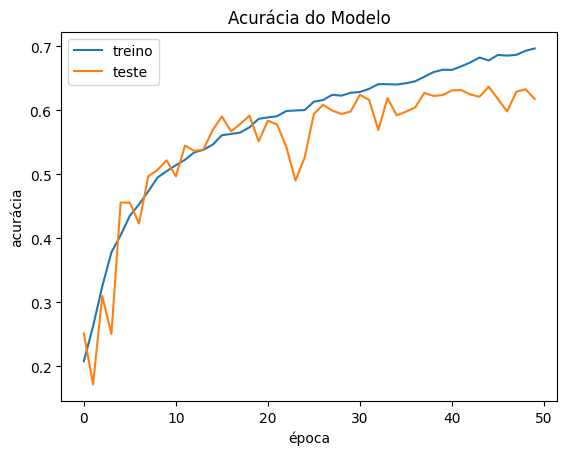

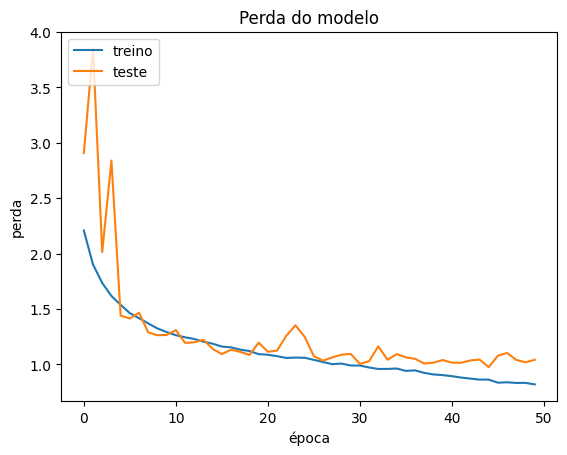

In [50]:
# plotamos a acurácia a partir do histórico
plt.plot(history.history['accuracy'])  # acurácia do treinamento
plt.plot(history.history['val_accuracy']) # acurácia na validação (teste)
plt.title('Acurácia do Modelo')
plt.ylabel('acurácia')
plt.xlabel('época')
plt.legend(['treino', 'teste'], loc='upper left')
plt.show()

# plotamos o erro/perda a partir do histórico
plt.plot(history.history['loss']) # perda/erro durante o treinamento
plt.plot(history.history['val_loss']) #perda/erro durante a validação (teste)
plt.title('Perda do modelo')
plt.ylabel('perda')
plt.xlabel('época')
plt.legend(['treino', 'teste'], loc='upper left')
plt.show()

181/181 ━━━━━━━━━━━━━━━━━━━━ 46s 92ms/step
Número de classes: 7
Rótulos reais: [0 1 2 3 4 5 6]


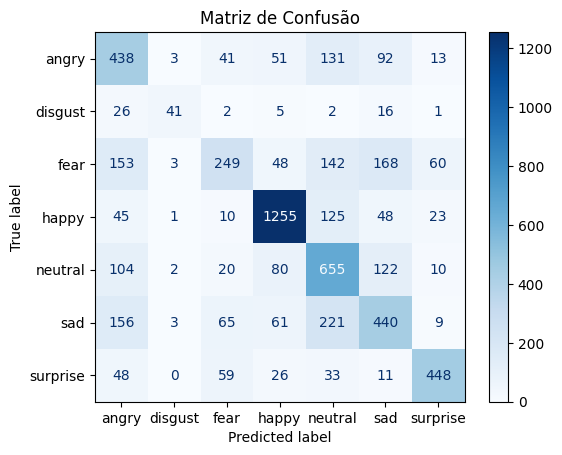

In [ ]:
# Fazer previsões no conjunto de teste
y_pred_prob = model_v3.predict(X_test)  # Saída do modelo em probabilidades
y_pred = np.argmax(y_pred_prob, axis=1)  # Converter para índices das classes

# Converter os rótulos reais para o mesmo formato
y_true = np.argmax(y_test_categorical, axis=1)

# Atualizar labels para corresponder ao número de classes
labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Gerar a matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()

### **Conclusão modelo 3:**
O 3º modelo se adaptou melhor que os outros modelos, tanto em questoes de acuracidade no treinamento quanto na indentificação de classes com menor quantidade de dados. Porem, a diferença de  8% entre a acurácia de treino e validação sugere um leve overfitting.

## **Criação do quarto Modelo**
Foi modificado um pouco o dropout para diminuir o problema de overfitting

- **1ª Camada:** Camada convolucional com 64 filtros de tamanho (5, 5), ativação ReLU e normalização em lote (batch normalization). Camadas de MaxPooling e Dropout (0.35 vs 0.3 do modelo 3) são adicionadas para regularização.

- **2ª Camada:** Camada convolucional com 128 filtros de tamanho (3, 3), ativação ReLU e normalização em lote. Camadas de MaxPooling e Dropout (0.35 vs 0.3 do modelo 3) são adicionadas para regularização.

- **3ª Camada:** Camada convolucional com 512 filtros de tamanho (3, 3), ativação ReLU e normalização em lote. Camadas de MaxPooling e Dropout (0.4 vs 0.3 do modelo 3) são adicionadas para regularização.

- **4ª Camada:** Camada convolucional com 512 filtros de tamanho (3, 3), ativação ReLU e normalização em lote. Camadas de MaxPooling e Dropout (0.4 vs 0.3 do modelo 3) são adicionadas para regularização.

- **Camada de Flatten:** Achata a saída das camadas convolucionais para que seja possível alimentá-la nas camadas totalmente conectadas (fully connected).

- **1ª Camada Totalmente Conectada:** Camada densa com 256 unidades e ativação ReLU, seguida por normalização em lote e dropout (0.4 vs 0.3 do modelo 3) para regularização.

- **2ª Camada Totalmente Conectada:** Camada densa com 512 unidades e ativação ReLU, seguida por normalização em lote e dropout (0.4 vs 0.3 do modelo 3) para regularização.

- **Camada de Saída:** Camada densa com ativação softmax para classificação multiclasse, com o número de unidades igual ao número de classes do conjunto de dados.

In [45]:
def get_model_v4():
    model = Sequential()
    
    # Primeira Camada
    model.add(Conv2D(64, (5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=(48, 48, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.35))  # Aumento do Dropout
    
    # Segunda Camada
    model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.35))  # Aumento do Dropout
    
    # Terceira Camada
    model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.4))  # Aumento do Dropout
    
    # Quarta Camada
    model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.4))
    
    # Flatten
    model.add(Flatten())
    
    # Primeira Camada Totalmente Conectada
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    
    # Segunda Camada Totalmente Conectada
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    
    # Camada de Saída
    model.add(Dense(num_classes, activation='softmax'))
    
    return model


In [46]:
# Contruindo o modelo 4
model_v4 = get_model_v4()
print(model_v4.summary())

c:\Users\ramom\Desktop\Pós\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 48, 48, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │             

 Total params: 4,348,679 (16.59 MB)

 Trainable params: 4,344,711 (16.57 MB)

 Non-trainable params: 3,968 (15.50 KB)

None


In [47]:
# Compilação do modelo
model_v4.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Para melhorar ainda mais o treinamento e agora já com o modelo mais sofisticado, vamos diminiur o batch_size para 64 (ante 128), buscando ter um desempenho melhor em termos de generalização que esta sendo o maior impacto a classes com poucos dados, resultando tambem em uma maior capacidade de evitar overfitting.

In [48]:
# Treinamento do modelo
history = model_v4.fit(
    data_gen.flow(X_train, y_train_categorical, batch_size=64),
    validation_data=(X_val, y_val_categorical),
    epochs=50,
    verbose=1
)

Epoch 1/50


c:\Users\ramom\Desktop\Pós\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


325/325 ━━━━━━━━━━━━━━━━━━━━ 134s 402ms/step - accuracy: 0.1830 - loss: 2.5157 - val_accuracy: 0.2515 - val_loss: 2.2362
Epoch 2/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 133s 408ms/step - accuracy: 0.2385 - loss: 1.9186 - val_accuracy: 0.3382 - val_loss: 1.7489
Epoch 3/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 132s 406ms/step - accuracy: 0.3115 - loss: 1.7436 - val_accuracy: 0.3591 - val_loss: 1.6103
Epoch 4/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 131s 404ms/step - accuracy: 0.3603 - loss: 1.6237 - val_accuracy: 0.3825 - val_loss: 1.6211
Epoch 5/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 131s 402ms/step - accuracy: 0.3943 - loss: 1.5623 - val_accuracy: 0.4029 - val_loss: 1.5628
Epoch 6/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 130s 401ms/step - accuracy: 0.4161 - loss: 1.5104 - val_accuracy: 0.3807 - val_loss: 1.6297
Epoch 7/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 134s 412ms/step - accuracy: 0.4424 - loss: 1.4411 - val_accuracy: 0.4662 - val_loss: 1.3623
Epoch 8/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 130s 399ms/step - accuracy: 0.4615 - loss: 1.40

In [49]:
# Save the model with .keras extension
model_v4.save("modelv4.keras")

In [50]:
# Saving the model with .h5 extension
model_v4.save('modelv4.h5')

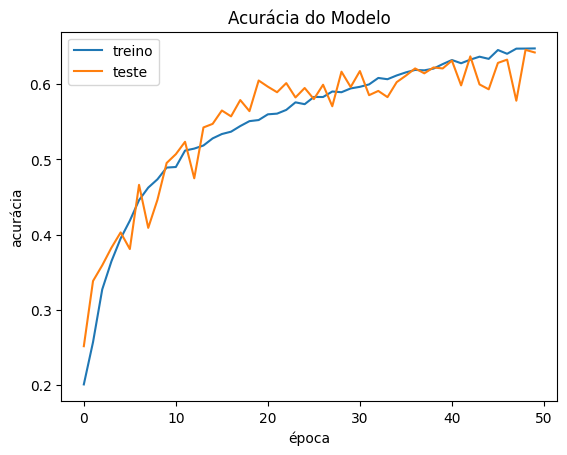

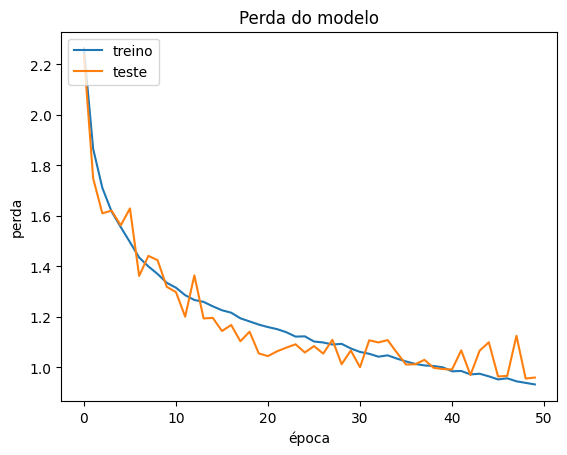

In [51]:
# plotamos a acurácia a partir do histórico
plt.plot(history.history['accuracy'])  # acurácia do treinamento
plt.plot(history.history['val_accuracy']) # acurácia na validação (teste)
plt.title('Acurácia do Modelo')
plt.ylabel('acurácia')
plt.xlabel('época')
plt.legend(['treino', 'teste'], loc='upper left')
plt.show()

# plotamos o erro/perda a partir do histórico
plt.plot(history.history['loss']) # perda/erro durante o treinamento
plt.plot(history.history['val_loss']) #perda/erro durante a validação (teste)
plt.title('Perda do modelo')
plt.ylabel('perda')
plt.xlabel('época')
plt.legend(['treino', 'teste'], loc='upper left')
plt.show()

181/181 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step


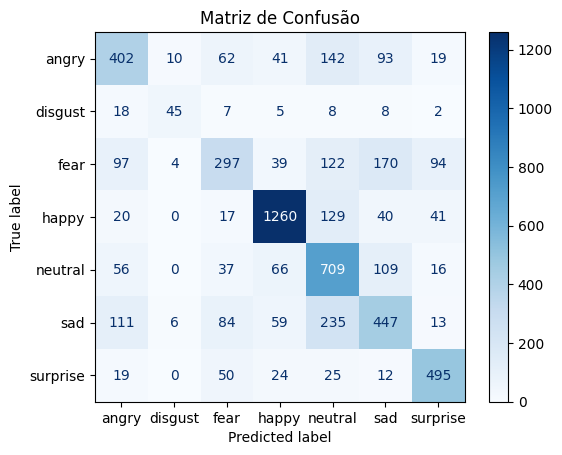

In [52]:
# Fazer previsões no conjunto de teste
y_pred_prob = model_v4.predict(X_test)  # Saída do modelo em probabilidades
y_pred = np.argmax(y_pred_prob, axis=1)  # Converter para índices das classes

# Converter os rótulos reais para o mesmo formato
y_true = np.argmax(y_test_categorical, axis=1)

# Atualizar labels para corresponder ao número de classes
labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Gerar a matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()

## **Conclusão:**
### **Comparação dos Modelos**
Abaixo está um resumo das métricas de desempenho para cada modelo (Com base na ultima época):

|Modelo	|Accuracy (Treino)	|Loss (Treino)	|Val Accuracy	|Val Loss|
|-------|-------------------|---------------|---------------|--------|
|Modelo 1	|0.6218	|1.0329	|0.5568	|1.2414|
|Modelo 2	|0.5852	|1.1024	|0.5919	|1.0723|
|Modelo 3	|0.6995	|0.8070	|0.6180	|1.0413|
|Modelo 4	|0.6533	|0.9155	|0.6422	|0.9600|

### **Análise dos Modelos**
- **Modelo 1:**
Desempenho modesto: O modelo tem a menor val_accuracy (55.68%) e um val_loss (1.2414) que não é competitivo em relação aos outros modelos.
É um modelo básico e menos robusto, apresentando dificuldade em capturar padrões complexos.

- **Modelo 2:**
Apesar de um pequeno diminuição no accuracy (treino) (58.52%) em relação ao Modelo 1, ele apresenta um val_accuracy (59.19%) mais elevado, 
alem disso o val_loss (1.0723) é menor que o Modelo 1, o que pode indicar uma melhora no problemas de generalização e de aprendizado.

- **Modelo 3:**
Melhor precisão em treino (69.95%), indicando que o modelo é mais poderoso e consegue aprender padrões mais complexos.
Porém, a diferença entre accuracy (treino) e val_accuracy (61.80%) sugere overfitting, ou seja, o modelo aprendeu bem os dados de treino, mas teve dificuldade em generalizar.

- **Modelo 4:**
Após os ajustes para reduzir o overfitting do modelo 3, o modelo 4 apresenta uma val_accuracy de 64.22%, a maior de todos.
O val_loss (0.9600) também é o mais baixo, indicando que o modelo generaliza melhor para os dados de validação.
Apesar de o accuracy (treino) ser um pouco menor (65.33%) em comparação ao Modelo 3, o foco aqui foi claramente a redução de overfitting e a melhora da generalização.

### **Conclusão Final - Qual o  melhor modelo**
Com base nos resultados apresentados, o **Modelo 4** é a melhor escolha para resolução do problema, pelos seguintes motivos:

- **Melhor Desempenho em Generalização:**
O Modelo 4 tem a maior val_accuracy (64.22%) e o menor val_loss (0.9600), mostrando que ele generaliza melhor para os dados de validação.

- **Redução do Overfitting:**
Os ajustes realizados, como data augmentation, learning rate scheduling e ajustes no Dropout, foram eficazes na redução do overfitting, permitindo que o modelo performasse bem tanto nos dados de treino quanto nos de validação.

- **Equilíbrio entre Treino e Validação:**
A diferença entre accuracy (treino) e val_accuracy no Modelo 4 é menor que a do Modelo 3, mostrando um equilíbrio entre aprendizado e generalização.